# RIOT API 데이터 저장하기

이제까지 롤 데이터를 분석하면서<p>
매번 riot api를 호출해서 데이터분석을 진행했습니다.<p>

이 때 다음의 문제가 있었습니다<p>
1. api key를 갱신해야 한다는 점
2. 요청 횟수가 초과 할 수도 있는 문제점

그래서 이번에는 데이터를 json 파일로 저장해서<p>
다음부터 api호출없이 저장된 데이터를 읽어 올 수 있도록 하겠습니다.

----

## .env에서 api key 가져오기

데이터를 저장하기 위해서는<p>
일단, 첫 번째의 호출이 필요합니다<p>

코어닷투데이에서는 코드보기가 가능하기 때문에<p>
자신의 api키를 그대로 변수에 할당하고 사용한다면<p>
불특정한 사람의 무분별한 호출로 api key가 제한 당할 수도 있습니다.<p>

그렇기 때문에 .env라는 숨겨진 파일에 api key를 저장해놓고 불러오는 방식을 사용하겠습니다.<p>
~~.env 작성 하는방법을 모르시는 분들은 이 스토리를 따라해 주세요 😃 [.env 작성법](https://core.today/story/ZK04L54f)~~

In [1]:
import os
from dotenv import load_dotenv

```python
import os
from dotenv import load_dotenv
```

os 모듈은 공식문서를 보면 다음과 같이 나와있습니다.

> '운영 체제와 상호 작용하기 위한 수십가지 함수들을 제공합니다'

os 모듈의 environ 함수를 사용하면 현재 파이썬 환경에서의 환경변수를 알 수 있습니다.

```python
os.environ
```

미리 .env에 riot_token키와 nickname키에<p> 
api key와 게임 닉네임을 value로 저장 했습니다.<p>

```python
load_dotenv()
```

위의 코드로 .env파일을 불러오면 다음의 결과가 뜹니다.

In [6]:
# .env 불러오기
load_dotenv()

True

In [7]:
# API key 및 닉네임 설정
riot_token = os.environ['riot_token']
nickname = os.environ['nickname']

```python
riot_token = os.environ['riot_token']
nickname = os.environ['nickname']
```

이제 api를 요청하도록 하겠습니다.

----

## 소환사 정보 저장하기

In [ ]:
import rquests

# 소환사 정보 api 받기
summoner_info_req_url = f'https://kr.api.riotgames.com/lol/summoner/v4/summoners/by-name/{nickname}?api_key={riot_token}'
summoner_info = requests.get(summoner_info_req_url)

#소환사 정보 json 저장
with open('my_summoner_info','w') as json_file:
    json.dump(summoner_info.json(),json_file,ensure_ascii=False) # 한글이 포함된 경우 ensure_ascii False

```python
import requests

summoner_info_req_url = f'https://kr.api.riotgames.com/lol/summoner/v4/summoners/by-name/{nickname}?api_key={riot_token}'
summoner_info = requests.get(summoner_info_req_url)
```

미리 할당한 변수로 요청 url에 api를 요청합니다

```python
with open('저장할 파일 이름','w') as json_file:
    json.dump(summoner_info.json(),json_file,ensure_ascii=False) # 한글이 포함된 경우 ensure_ascii False
```

my_summoner_info로 파일명을 정하고<p>
위의 요청 결과인 summoner_info를 json 파일 형식으로 저장했습니다.

----

## 매치 기록 저장하기

위에서 저장한 소환사 정보로 총 100건의 매치를 불러오고 저장하겠습니다.<p>
이번에 저장할 데이터는 match id입니다.<p>
match id를 이용해서 상세 match 데이터 및 타임라인 데이터를 불러올 수 있습니다.<p>

```python
with open('저장한 소환사 정보 경로','r') as file:
    my_summoner_info = json.load(file)
    
puuid = my_summoner_info['puuid'] 
```

위에서 저장한 소환사 정보를 불러와서 puuid 데이터를 가져왔습니다.<p>
puuid는 match id 를 요청할 때 입력으로 필요합니다.

In [ ]:
# 변수 지정
start = 0
count = 100

# 데이터 
match_req_url = f'https://asia.api.riotgames.com/lol/match/v5/matches/by-puuid/{puuid}/ids?start={start}&count={count}&api_key={riot_token}'
match_list = requests.get(match_req_url)

```python
start = 0
count = 100

match_req_url = f'https://asia.api.riotgames.com/lol/match/v5/matches/by-puuid/{puuid}/ids?start={start}&count={count}&api_key={riot_token}'
match_list = requests.get(match_req_url)
```

start에 0,<p>
count에 100을 입력하고 데이터를 요청합니다.<p>
가장 최근 게임은 0번 부터 시작하고 총 100건의 데이터를 가져온다는 의미입니다.<p>
~~한번에 불러올 수 있는 양 100건~~

In [ ]:
with open('my_100match_data/my_100match_data_0421','w') as file:
        json.dump(match_list.json(), file, ensure_ascii=False)

```python
with open('저장할 파일 이름','w') as file:
        json.dump(match_list.json(), file, ensure_ascii=False)
```

이번에도 위에서 했던것 처럼 저장해줍니다.

여기서 with를 쓰면 파일을 자동으로 닫아 줍니다.<p>
    간혹 open 함수로 txt 파일이나 여러 파일을 열고 close()를 하지 않으면<p>
        파일이 계속 열어져 있는 채로 존재하는데 이러한 것을 방지해줍니다.

----

# /lol/match/v5/matches/{matchId} 데이터 저장하기

해당 요청 url로 요청한 데이터는 앞으로 다음과 같이 부르겠습니다.<p>
> match_api

In [ ]:
with open('my_100match_data/my_100match_data_0421','r') as match_list_file:
    match_list = json.load(match_list_file)

```python
with open('저장한 매치 아이디 목록 경로','r') as match_list_file:
    match_list = json.load(match_list_file)
```

위에서 저장한 매치 아이디 목록을 match_list로 불러왔습니다.<p>
이제 해당 리스트를 순회 하면서 api를 호출하겠습니다.

In [ ]:
# match_api 요청하기

requests_limit = 0

for match_id in match_list:
    
    if requests_limit==20:
        time.sleep(1)
    elif requests_limit==100:
        time.sleep(120)
        
    match_api_req_url = f'https://asia.api.riotgames.com/lol/match/v5/matches/{match_id}?api_key={riot_token}'
    match_api = requests.get(match_api_req_url)
    
    requests_limit += 1
    
    # match_api 저장
    with open(f'match_api/{match_id}','w') as match_api_file:
        json.dump(match_api.json(), match_api_file, ensure_ascii=False)

if requests_limit==100:
    time.sleep(120)

```python 
# 호출 횟수 제한 
requests_limit = 0

# 리스트 순회하면서 api 호출
for match_id in match_list:
    
    # 1초에 최대 20회
    if requests_limit==20:
        time.sleep(1)
    # 2분에 최대 100회
    elif requests_limit==100:
        time.sleep(120)
        
    # api 요청    
    match_api_req_url = f'https://asia.api.riotgames.com/lol/match/v5/matches/{match_id}?api_key={riot_token}'
    match_api = requests.get(match_api_req_url)
    
    # 호출 횟수 증가 
    requests_limit += 1
    
    # match_api 저장
    with open(f'저장할 파일 이름','w') as match_api_file:
        json.dump(match_api.json(), match_api_file, ensure_ascii=False)
        
if requests_limit==100:
    time.sleep(120)
    
```

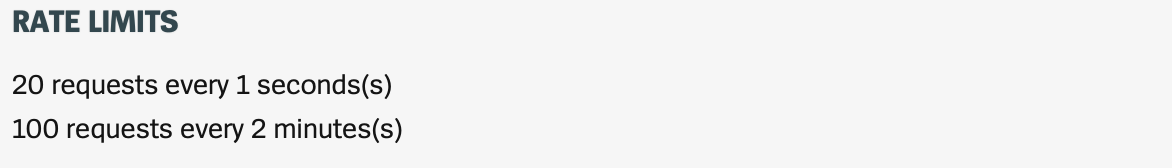

riot api에는 호출 횟수 제한이 있습니다.<p>

이 제한을 초과하지 않는것이 좋습니다.

> ~~호출 횟수를 초과하고 몇일 동안 api block 당한적이 있습니다...~~

그래서 위에 if문을 사용해서 실수로 제한을 초과하지 않도록 넣어줬습니다.<p>
마지막 부분도 jupyter notebook을 한번에 실행하면 바로 다음 호출을 할 수도 있어서<p>
2분동안 기다리라는 명령입니다.

----

# /lol/match/v5/matches/{matchId}/timeline 데이터 저장하기

해당 요청 url로 요청한 데이터는 앞으로 다음과 같이 부르겠습니다.<p>
> match_timeline_api

In [ ]:
# match_timeline_api 요청하기

requests_limit = 0

for match_id in match_list:
    
    if requests_limit==20:
        time.sleep(1)
    elif requests_limit==100:
        time.sleep(120)
        
    match_timeline_api_req_url = f'https://asia.api.riotgames.com/lol/match/v5/matches/{match_id}/timeline?api_key={riot_token}'
    match_timeline_api = requests.get(match_api_req_url)
    
    requests_limit += 1
    
    # match_api 저장
    with open(f'match_timeline_api/{match_id}','w') as match_timeline_api_file:
        json.dump(match_timeline_api.json(), match_timeline_api_file, ensure_ascii=False)

if requests_limit==100:
    time.sleep(120)

```python
# match_timeline_api 요청하기

requests_limit = 0

for match_id in match_list:
    
    if requests_limit==20:
        time.sleep(1)
    elif requests_limit==100:
        time.sleep(120)
        
    match_timeline_api_req_url = f'https://asia.api.riotgames.com/lol/match/v5/matches/{match_id}/timeline?api_key={riot_token}'
    match_timeline_api = requests.get(match_api_req_url)
    
    requests_limit += 1
    
    # match_api 저장
    with open(f'저장할 파일 이름','w') as match_timeline_api_file:
        json.dump(match_timeline_api.json(), match_timeline_api_file, ensure_ascii=False)

if requests_limit==100:
    time.sleep(120)
```

match_appi를 했을 때와 마찬가지로 해주시면 됩니다.<p>

이제 op.gg같은 롤 분석 사이트처럼 데이터를 쌓아갈 수 있습니다!<p>

또 매번 호출 횟수를 초과할까 조마조마 하지 않으며 데이터를 사용할 수 있습니다!<p><br>   
   
질문이나 피드백 환영입니다 :)<p>
읽어주셔서 감사합니다.